In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np

In [41]:
train = pd.read_csv('C:/Users/user/LikeLion_AI/data/CSV/DACON_Parking_Demand/train.csv')
test = pd.read_csv('C:/Users/user/LikeLion_AI/data/CSV/DACON_Parking_Demand/test.csv')
sub = pd.read_csv('C:/Users/user/LikeLion_AI/data/CSV/DACON_Parking_Demand/sample_submission.csv')
age = pd.read_csv('C:/Users/user/LikeLion_AI/data/CSV/DACON_Parking_Demand/age_gender_info.csv')

train.shape, test.shape, sub.shape, age.shape

((2952, 15), (1022, 14), (150, 2), (16, 23))

### 컬럼 확인

In [42]:
train.columns, test.columns

(Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
        '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
        '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
       dtype='object'),
 Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
        '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
        '도보 10분거리 내 버스정류장 수', '단지내주차면수'],
       dtype='object'))

### head 확인

In [43]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


### 범주형 변수 몇 개만 확인

In [44]:
print(train['임대건물구분'].value_counts())
print(train['지역'].value_counts())

아파트    2390
상가      562
Name: 임대건물구분, dtype: int64
경기도        621
경상남도       369
부산광역시      328
대전광역시      266
강원도        187
충청북도       163
충청남도       158
전라남도       151
광주광역시      141
경상북도       119
전라북도       109
대구광역시      102
제주특별자치도     91
서울특별시       64
세종특별자치시     47
울산광역시       36
Name: 지역, dtype: int64


### 라벨 인코딩

In [45]:
from sklearn.preprocessing import LabelEncoder

train_1 = train.copy()

encoder = LabelEncoder()
encoder.fit(train['임대건물구분'])
train_1['임대건물구분'] = encoder.transform(train['임대건물구분'])

encoder.fit(train_1['지역'])
train_1['지역'] = encoder.transform(train['지역'])

encoder.fit(train_1['공급유형'])
train_1['공급유형'] = encoder.transform(train['공급유형'])
train_1['공급유형'].value_counts()

5    1758
7     562
9     213
1     205
6     152
2      31
4      12
8       9
0       7
3       3
Name: 공급유형, dtype: int64

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

### 모델 구성 및 예측

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

sel = ['전용면적', '임대건물구분', '전용면적별세대수', '공가수', '단지내주차면수', '지역', '공급유형']

X = train_1[sel]
y = train_1['등록차량수']

ex_X = PolynomialFeatures(degree=3,
         include_bias=False).fit_transform(X)  # 데이터 feature 추가 생성

X_train, X_test, y_train, y_test = train_test_split(ex_X, y, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred

array([ 849.92479542, 1154.23346549,  703.62662966,  967.16310464,
        761.57531807,   88.89047994,  103.67789562,  104.85351217,
        646.31216299,  649.79678013,  165.10409441,  343.44323913,
        870.8250123 , 1017.05832841,  317.237029  ,  275.95467879,
        961.461572  ,  840.75066118,  149.76400735,  627.32730077,
        124.19801004,  580.02460428,  743.48463825,  603.7145108 ,
        -38.30182966,  752.46914279,  739.39498937, 1142.97658592,
        563.67274408,  703.83682944,  671.99303404, 1508.1793174 ,
        699.8525495 ,  405.50613086,  130.02428593,  487.33040216,
        877.15402309,  355.57942515,  273.39158608, 1731.43446186,
        224.6342565 ,  370.97611744,  171.38607033,  916.22880053,
        204.6510709 , 1078.55058038, 1518.49705891,  246.9338898 ,
        653.63893456,  383.62786497,  532.79637783,  539.31291602,
        450.32348644,  532.68798794,  485.89194192,  893.73462689,
        563.07937011,  102.0005273 ,  735.92810282,  501.25736

### 회귀 분석 모델 평가

In [70]:
MAE = abs(y_test - pred).sum() / len(y_test)
MSE = ((y_test - pred)**2).sum() / len(y_test)
RMSE = np.sqrt(((y_test - pred)**2).sum() / len(y_test))

log_part = list(np.log(abs(y_test)+1) - np.log(abs(pred)+1))
RMSLE = np.sqrt(sum(log_part)**2/len(y_test))

print('MAE : {:.3f}, MSE : {:.3f}, RMSE : {:.3f}, RMSLE : {:.3f}'
      .format(MAE, MSE, RMSE, RMSLE))

MAE : 121.444, MSE : 30572.535, RMSE : 174.850, RMSLE : 1.067


In [71]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error

np.sqrt(mean_squared_log_error(abs(y_test), abs(pred))), mean_squared_error(y_test, pred)

(0.406884620047192, 30572.534780555095)

### Lasso 모델 적용 & alpha 값에 따른 plot

< alpha = 0.0 >
학습 데이터 셋 점수 :0.880
테스트 데이터 셋 점수 :0.839
MAE : 121.283, MSE : 31747.980


< alpha = 0.05 >
학습 데이터 셋 점수 :0.880
테스트 데이터 셋 점수 :0.839
MAE : 121.388, MSE : 31767.950


< alpha = 0.1 >
학습 데이터 셋 점수 :0.880
테스트 데이터 셋 점수 :0.840
MAE : 121.171, MSE : 31564.442


< alpha = 0.15 >
학습 데이터 셋 점수 :0.880
테스트 데이터 셋 점수 :0.841
MAE : 121.036, MSE : 31414.744


< alpha = 0.2 >
학습 데이터 셋 점수 :0.880
테스트 데이터 셋 점수 :0.842
MAE : 120.927, MSE : 31296.436


< alpha = 0.25 >
학습 데이터 셋 점수 :0.880
테스트 데이터 셋 점수 :0.842
MAE : 120.855, MSE : 31218.506


< alpha = 0.3 >
학습 데이터 셋 점수 :0.880
테스트 데이터 셋 점수 :0.843
MAE : 120.760, MSE : 31128.879


< alpha = 0.35 >
학습 데이터 셋 점수 :0.880
테스트 데이터 셋 점수 :0.843
MAE : 120.661, MSE : 31044.346


< alpha = 0.4 >
학습 데이터 셋 점수 :0.880
테스트 데이터 셋 점수 :0.843
MAE : 120.585, MSE : 30982.860


< alpha = 0.45 >
학습 데이터 셋 점수 :0.880
테스트 데이터 셋 점수 :0.843
MAE : 120.590, MSE : 30989.069


< alpha = 0.5 >
학습 데이터 셋 점수 :0.880
테스트 데이터 셋 점수 :0.843
MAE : 120.553, MSE : 30965.242




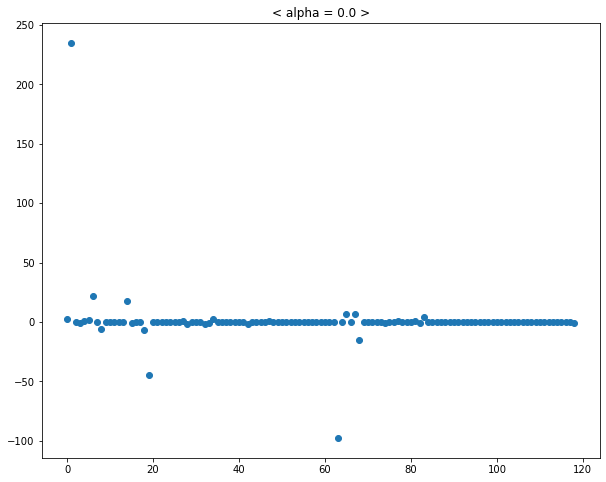

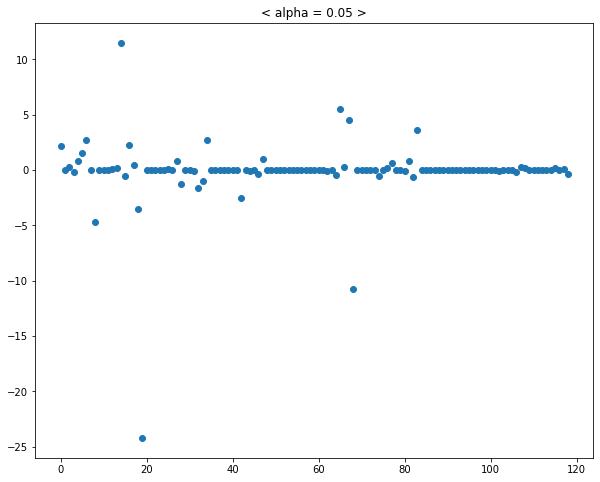

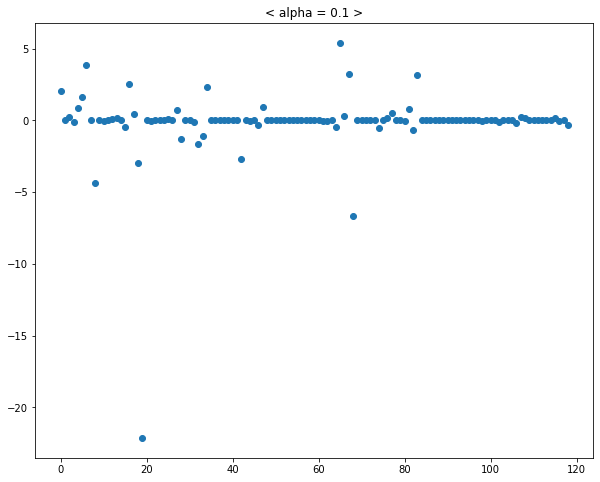

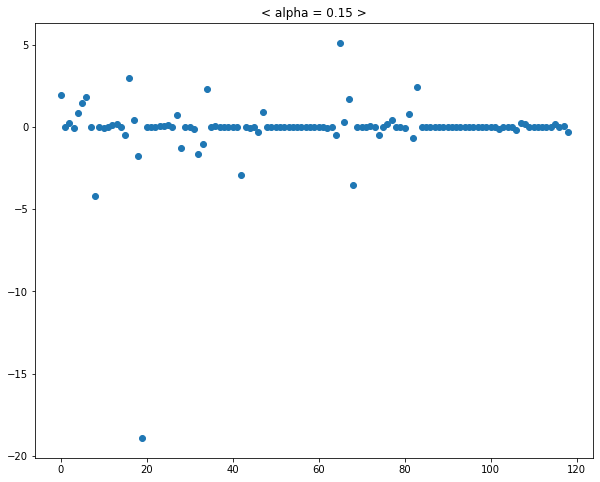

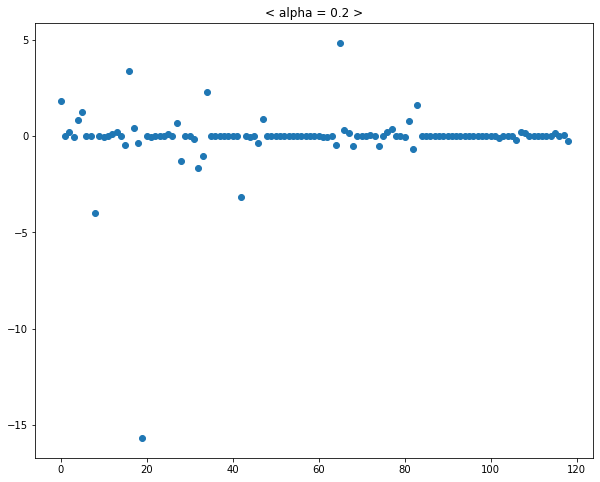

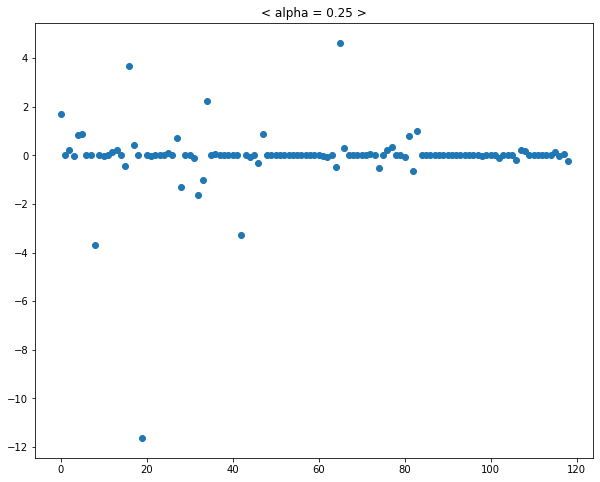

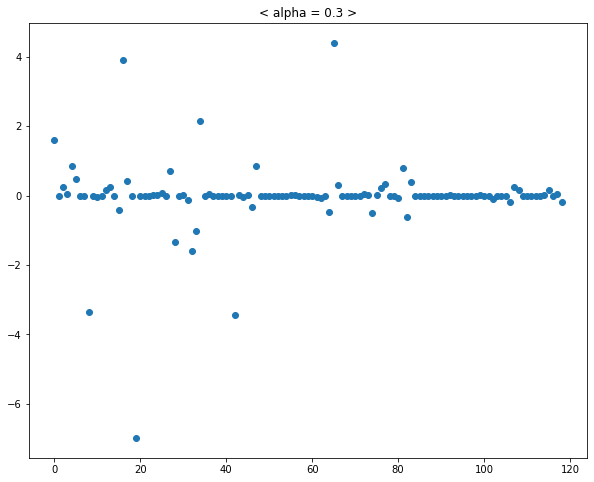

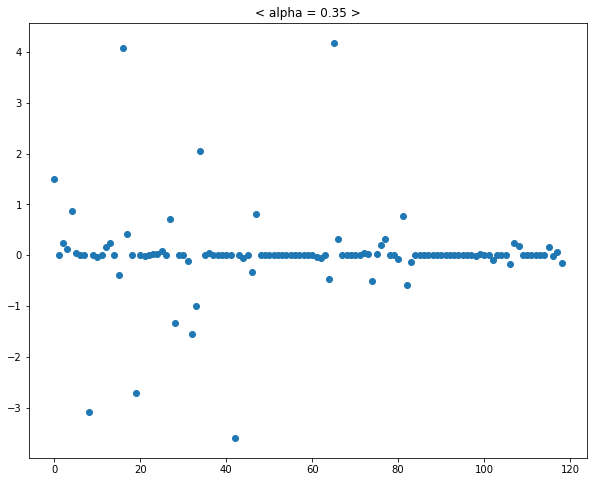

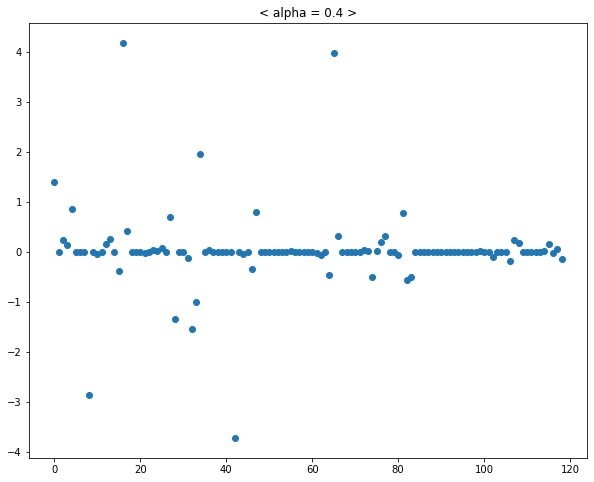

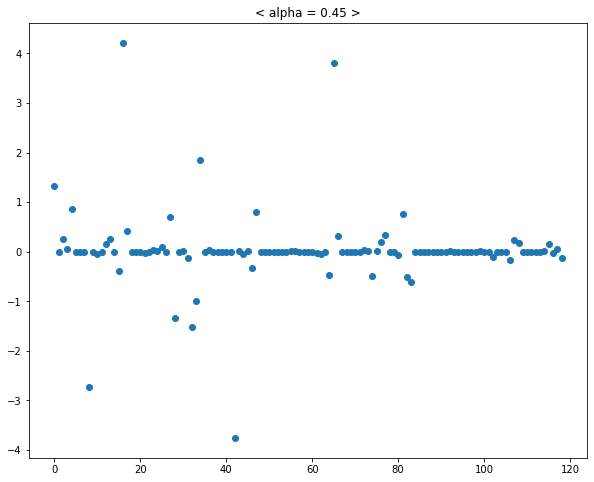

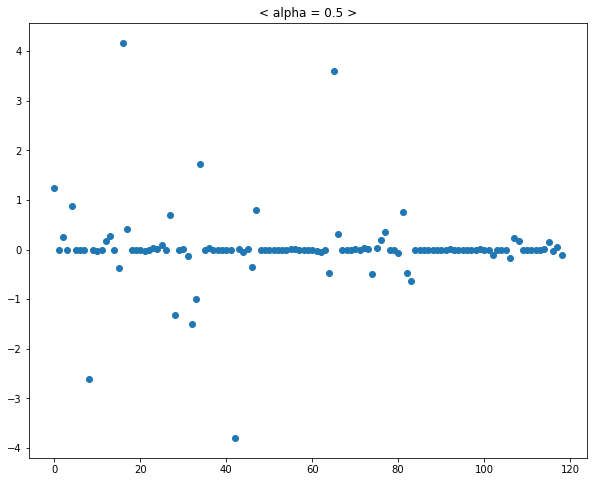

In [72]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings(action='ignore')

ax = [None for _ in range(11)]

for i in range(0, 51, 5):
    L1 = Lasso(alpha=i/100)
    L1.fit(X_train, y_train)
    pred = L1.predict(X_test)
    
    L1_train = L1.score(X_train, y_train)
    L1_test = L1.score(X_test, y_test)
    
    print(f'< alpha = {i/100} >')
    print('학습 데이터 셋 점수 :%.3f' %L1_train)
    print('테스트 데이터 셋 점수 :%.3f' %L1_test)
    
    plt.figure(figsize=(10, 8), facecolor='white')
    
    ax[i//5] = plt.subplot()
    plt.plot(L1.coef_, 'o')
    plt.title(f'< alpha = {i/100} >')
    
    MAE = mean_absolute_error(y_test, pred)
    MSE = mean_squared_error(y_test, pred)
    
    print('MAE : {:.3f}, MSE : {:.3f}\n\n'.format(MAE, MSE))

### Lasso 모델 적용 & alpha 값에 따른 plot

< alpha = 0.0 >
학습 데이터 셋 점수 :0.876
테스트 데이터 셋 점수 :0.841
MAE : 122.682, MSE : 31443.327


< alpha = 0.05 >
학습 데이터 셋 점수 :0.883
테스트 데이터 셋 점수 :0.845
MAE : 121.453, MSE : 30581.220


< alpha = 0.1 >
학습 데이터 셋 점수 :0.883
테스트 데이터 셋 점수 :0.845
MAE : 121.464, MSE : 30590.174


< alpha = 0.15 >
학습 데이터 셋 점수 :0.883
테스트 데이터 셋 점수 :0.845
MAE : 121.474, MSE : 30598.538


< alpha = 0.2 >
학습 데이터 셋 점수 :0.883
테스트 데이터 셋 점수 :0.845
MAE : 121.483, MSE : 30606.370


< alpha = 0.25 >
학습 데이터 셋 점수 :0.883
테스트 데이터 셋 점수 :0.845
MAE : 121.491, MSE : 30613.721


< alpha = 0.3 >
학습 데이터 셋 점수 :0.883
테스트 데이터 셋 점수 :0.845
MAE : 121.499, MSE : 30620.637


< alpha = 0.35 >
학습 데이터 셋 점수 :0.883
테스트 데이터 셋 점수 :0.845
MAE : 121.506, MSE : 30627.158


< alpha = 0.4 >
학습 데이터 셋 점수 :0.883
테스트 데이터 셋 점수 :0.845
MAE : 121.513, MSE : 30633.317


< alpha = 0.45 >
학습 데이터 셋 점수 :0.883
테스트 데이터 셋 점수 :0.845
MAE : 121.522, MSE : 30639.146


< alpha = 0.5 >
학습 데이터 셋 점수 :0.883
테스트 데이터 셋 점수 :0.845
MAE : 121.531, MSE : 30644.673




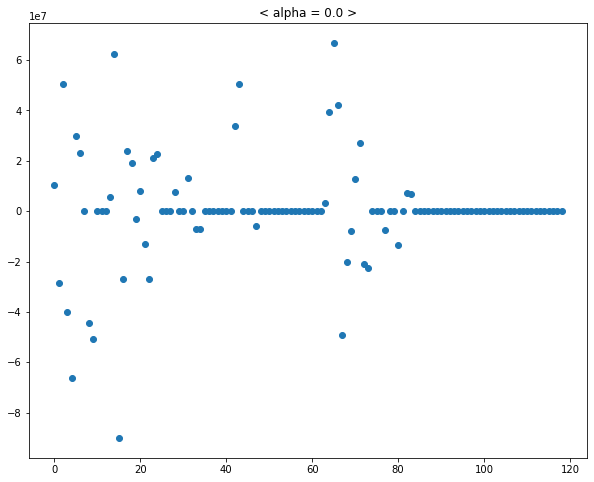

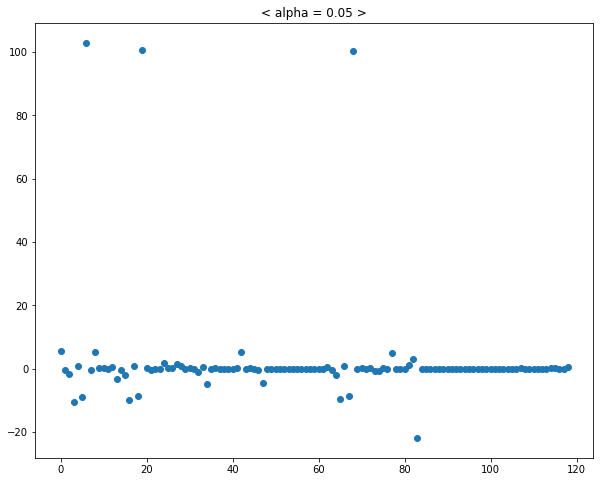

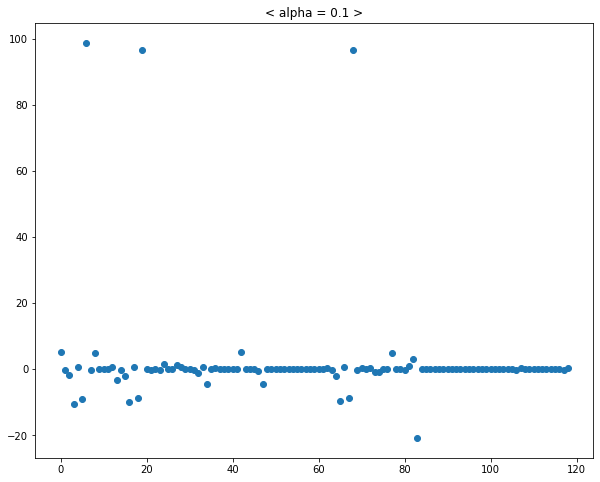

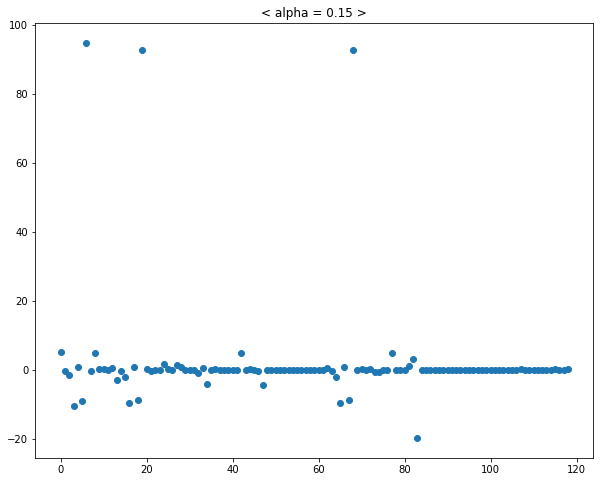

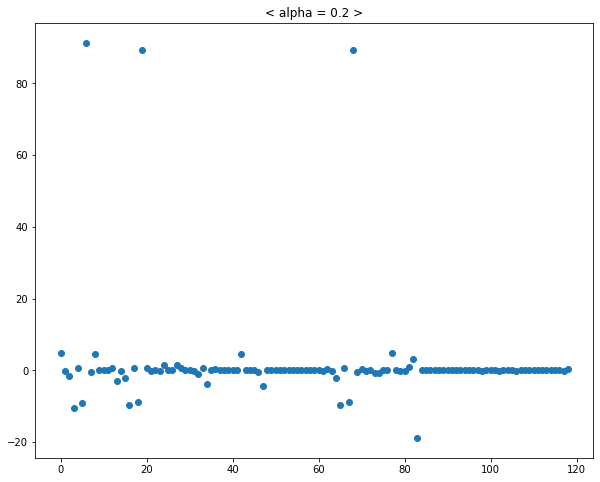

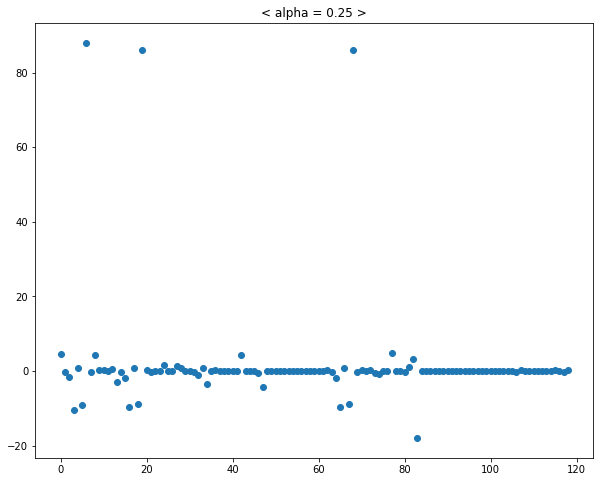

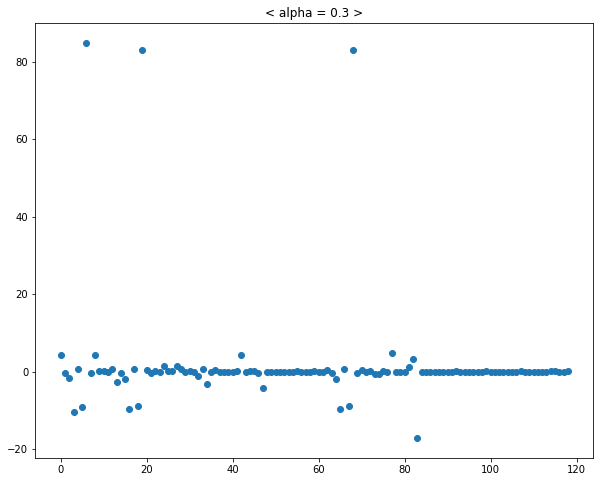

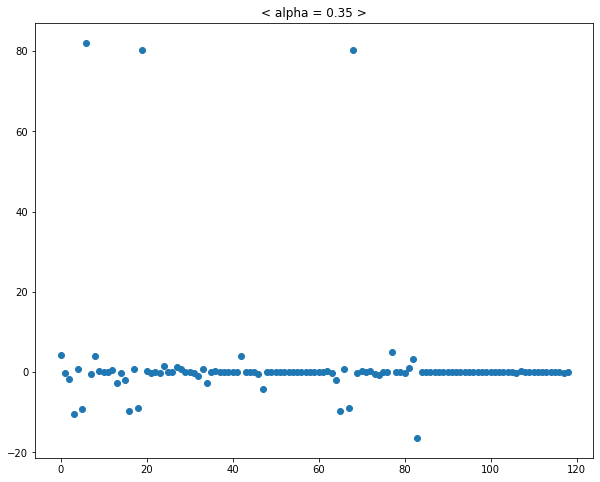

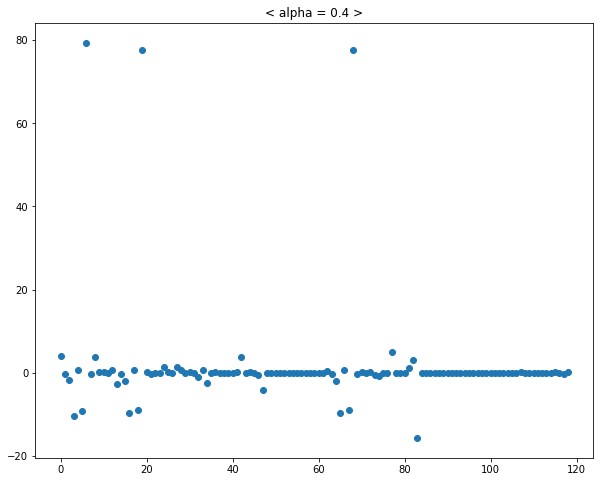

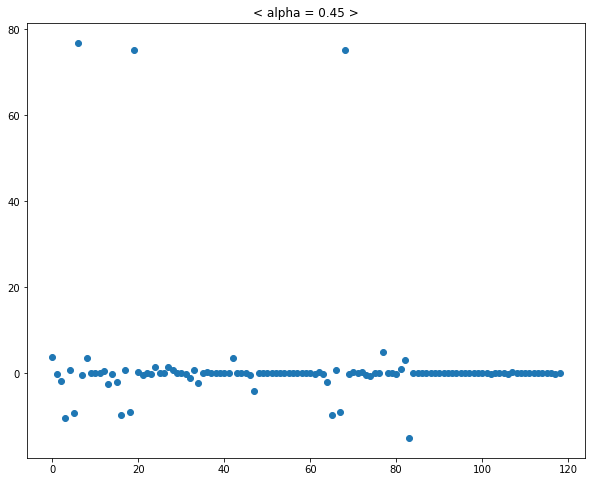

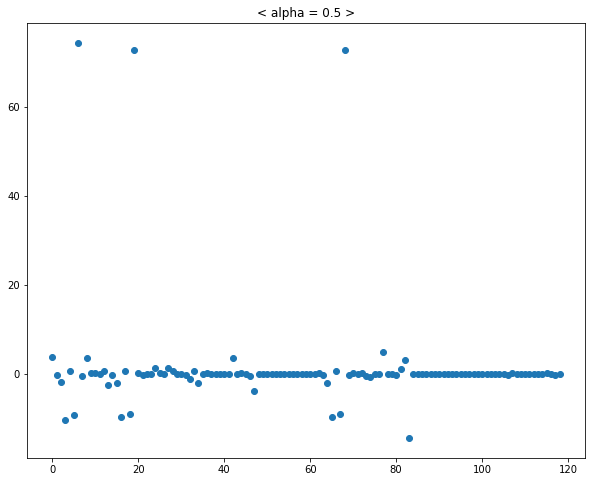

In [73]:
warnings.filterwarnings(action='ignore')

ax = [None for _ in range(11)]

for i in range(0, 51, 5):
    L2 = Ridge(alpha=i/100)
    L2.fit(X_train, y_train)
    pred = L2.predict(X_test)
    
    L2_train = L2.score(X_train, y_train)
    L2_test = L2.score(X_test, y_test)
    
    print(f'< alpha = {i/100} >')
    print('학습 데이터 셋 점수 :%.3f' %L2_train)
    print('테스트 데이터 셋 점수 :%.3f' %L2_test)
    
    plt.figure(figsize=(10, 8), facecolor='white')
    
    ax[i//5] = plt.subplot()
    plt.plot(L2.coef_, 'o')
    plt.title(f'< alpha = {i/100} >')
    
    MAE = mean_absolute_error(y_test, pred)
    MSE = mean_squared_error(y_test, pred)
    
    print('MAE : {:.3f}, MSE : {:.3f}\n\n'.format(MAE, MSE))

### 진행중 ..